## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [79]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    'Datasets/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
    'Datasets/valid',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Build the model
model = Sequential()
model.add(base_model)

# Use either Flatten or GlobalAveragePooling2D to convert 4D to 2D
model.add(GlobalAveragePooling2D())  # Or Flatten()

# Add a dense layer with 1024 units (or adjust if needed)
model.add(Dense(1024, activation='relu'))

# Add output layer (assuming 11 classes)
model.add(Dense(11, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)



Found 25849 images belonging to 11 classes.
Found 6682 images belonging to 11 classes.
58889256/58889256 [==============================] - 303s 5us/step
Epoch 1/30


2024-09-18 12:38:27.696414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


807/807 [==============================] - ETA: 0s - loss: 0.9074 - accuracy: 0.6801

2024-09-18 13:13:40.960782: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


807/807 [==============================] - 2236s 3s/step - loss: 0.9074 - accuracy: 0.6801 - val_loss: 0.4871 - val_accuracy: 0.8236
Epoch 2/30
807/807 [==============================] - 2249s 3s/step - loss: 0.4036 - accuracy: 0.8598 - val_loss: 0.2766 - val_accuracy: 0.9022
Epoch 3/30
807/807 [==============================] - 2269s 3s/step - loss: 0.3085 - accuracy: 0.8924 - val_loss: 0.3459 - val_accuracy: 0.8833
Epoch 4/30
807/807 [==============================] - 66478s 82s/step - loss: 0.2329 - accuracy: 0.9212 - val_loss: 0.2591 - val_accuracy: 0.9130
Epoch 5/30
807/807 [==============================] - 2218s 3s/step - loss: 0.1965 - accuracy: 0.9324 - val_loss: 0.1852 - val_accuracy: 0.9401
Epoch 6/30
807/807 [==============================] - 2215s 3s/step - loss: 0.1596 - accuracy: 0.9464 - val_loss: 0.1778 - val_accuracy: 0.9432
Epoch 7/30
807/807 [==============================] - 2207s 3s/step - loss: 0.1450 - accuracy: 0.9510 - val_loss: 0.1876 - val_accuracy: 0.9390
E

In [80]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // valid_generator.batch_size)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


2024-09-24 09:39:17.214603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


208/208 [==============================] - 125s 601ms/step - loss: 0.1599 - accuracy: 0.9603
Validation Loss: 0.1599
Validation Accuracy: 0.9603


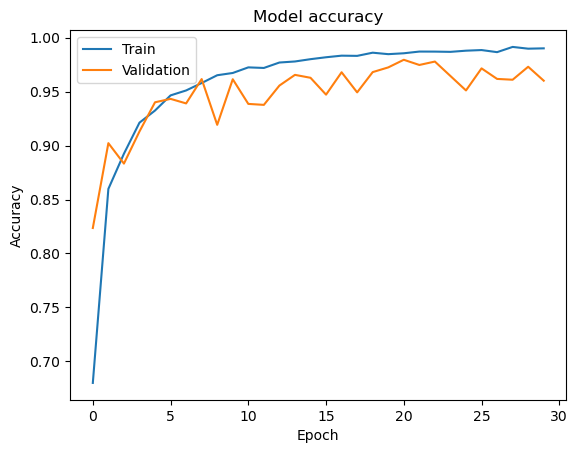

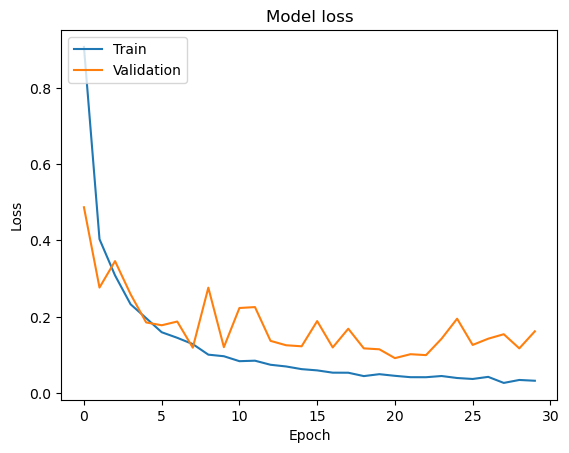

In [81]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [82]:
# Save the VGG model as an h5 file
model.save('model_vgg.h5')

In [1]:
y_pred = model.predict(test_set)

NameError: name 'model' is not defined